# Meetup Strategy -- Social information from aritifical friendship -- Visualisation

In [1]:
from meetup_process import MeetupStrategy
import feather as ft
import numpy as np
import matplotlib.pyplot as plt
from math import log, e
import time
import pickle
import pandas as pd
%load_ext autoreload
%autoreload 2

## Data import

In [3]:
df_wp = ft.read_dataframe('data/weeplace_checkins_without_loc_NA.feather') # it is the dataset without NA location
# df_wp = ft.read_dataframe('social-predictability/data/weeplace_checkins_without_loc_NA.feather') # it is the dataset without NA location
# # it will be the same if you use the original csv file.
# df_wp= pd.read_csv('data/weeplace_checkins.csv')  # this is original Weeplace dataset without any processing, including some NA location
# df_wp = df_wp.dropna(subset=["placeid",'userid', 'datetime'])

user_list = sorted(list(set(df_wp['userid'].tolist())))

# import meetup_store
pickle_in = open("results/meetup_store.pickle", "rb")
# pickle_in = open("social-predictability/meetup_store.pickle", "rb")
meetup_store = pickle.load(pickle_in)
pickle_in.close()

# concat as a dataframe
user_meetup=pd.concat(meetup_store)
user_meetup=user_meetup.rename(columns = {'count':'meetup'})

## import users' temporal placeid 
# pickle_in = open("social-predictability/user_placeidT.pickle", "rb")
pickle_in = open("results/user_placeidT.pickle", "rb")
user_placeidT = pickle.load(pickle_in)
pickle_in.close()

In [51]:
user_stats = pd.read_csv('results/user-meetup-info.csv')
ego_stats = pd.read_csv('results/user-ego-info.csv')

user_stats_all = pd.read_csv('results/user-meetup-info-all.csv')
ego_stats_all = pd.read_csv('results/user-ego-info-all.csv')

## Build MeetupStrategy

In [52]:
LetMS = MeetupStrategy(user_list, user_meetup, user_placeidT, 
                       user_stats=user_stats, ego_stats=ego_stats,
                      user_stats_all=user_stats_all, ego_stats_all=ego_stats_all)

## Histogram Plot for entropy and predictability limit

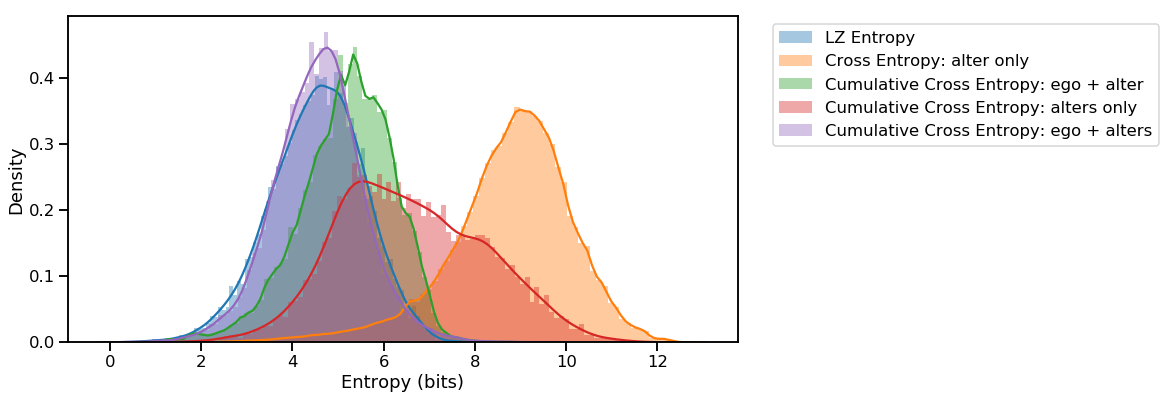

In [53]:
LetMS.hist_entropy()

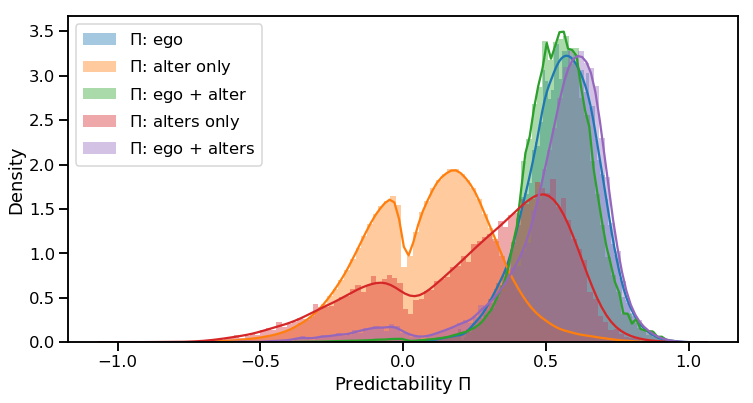

In [54]:
LetMS.hist_pred()

## Plot for comparing entropies and predictabilities with the number of added alters

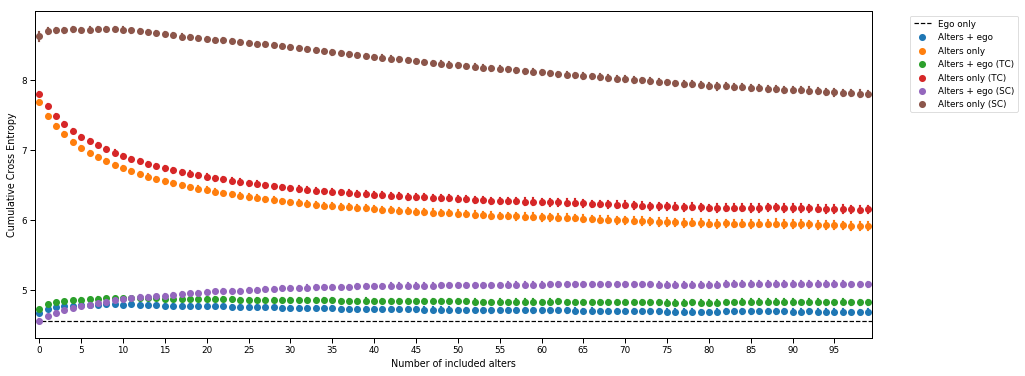

In [56]:
LetMS.num_point_plot('entropy', threshold=100, interval=None, l=15, w=6, mode='paper',
                     control=True, figsave=False)

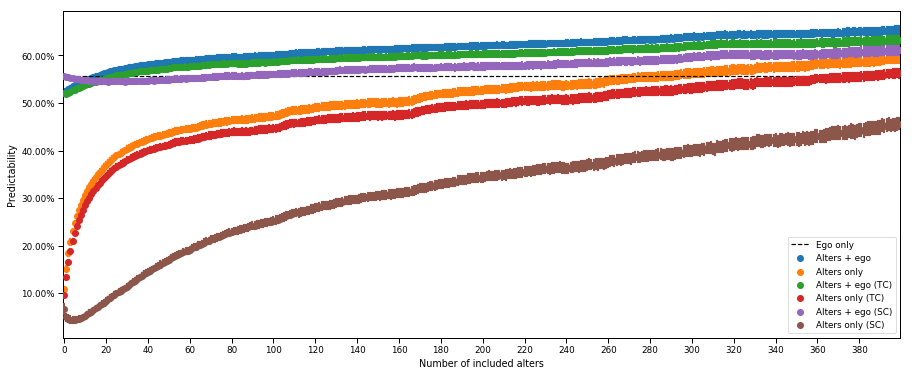

In [57]:
LetMS.num_point_plot('predictability', threshold=400, interval=None, l=15, w=6, mode='paper',
                     control=True, figsave=False)